In [288]:
#Observation from the below analysis are as follows:

#1.Probability distribution between test groups is Bernoulli Distribution,charts are as shown.
#2Test group users(call-in) are less likely (52.6%) to have at least 1 additional REBILL than control group users(webform)(73.6%)
#3.Webform/control group users generate more revenue than web-form users.
#4.Charge back rate of call-in users (0.017) is slightly less that web-form users(0.028)

In [289]:
#importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [290]:
#uploading the data
path="E:/transData.csv"
df_trans=pd.read_csv(path)

In [291]:
path="E:/testSamples.csv"
df_test=pd.read_csv(path)

In [292]:
#understanding the data
df_trans.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95


In [293]:
df_test.head(5)

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [294]:
df_trans.describe(include="all")
#no outliers observed

,transaction_id,sample_id,transaction_type,transaction_amount
count,7.430000e+03,7430.000000,7430,7430.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,REBILL,NaN
freq,NaN,NaN,6961,NaN
mean,5.235004e+07,30245.874024,NaN,24.935720
std,2.145001e+03,17064.733330,NaN,15.050653
min,5.234633e+07,11.000000,NaN,-39.950000
25%,5.234818e+07,15866.250000,NaN,24.950000
50%,5.235004e+07,30557.000000,NaN,24.950000
75%,5.235190e+07,44945.000000,NaN,32.950000


In [295]:
#understanding the data
df_test.describe(include="all")

,sample_id,test_group
count,59721.00000,59721.000000
mean,29861.00000,0.248405
std,17240.11205,0.432092
min,1.00000,0.000000
25%,14931.00000,0.000000
50%,29861.00000,0.000000
75%,44791.00000,0.000000
max,59721.00000,1.000000


In [296]:
#joining the data sets into one data frame
df = pd.merge(df_trans, df_test)

In [297]:
#checking for NUlL values if any
df.isnull()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7425,False,False,False,False,False
7426,False,False,False,False,False
7427,False,False,False,False,False
7428,False,False,False,False,False


In [298]:
df.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1


In [299]:
## First analysis : What is the aproximate probability distribution between the test group and the control group ##

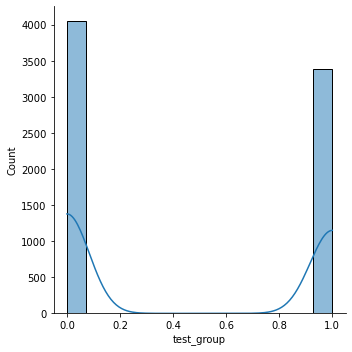

In [300]:
from scipy.stats import bernoulli
def bernoulliDist():
    bernoulli_data = df['test_group']
    sns.displot(bernoulli_data,  kde = True,)

bernoulliDist()

In [301]:
#Probability distribution between test groups is Bernoulli Distribution,charts are as shown.

In [302]:
# SECOND ANALYSIS:Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL  

In [303]:
#filtering the data for control group for rebill
df_control_group = df[(df.test_group == 0) & (df.transaction_type=='REBILL')]
df_control_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,52346332,103,REBILL,19.95,0
7,52346333,103,REBILL,19.95,0
8,52346334,103,REBILL,19.95,0
9,52346335,103,REBILL,19.95,0
10,52346336,103,REBILL,19.95,0
...,...,...,...,...,...
7417,52353743,59573,REBILL,24.95,0
7418,52353744,59573,REBILL,24.95,0
7419,52353745,59573,REBILL,24.95,0
7427,52353753,59689,REBILL,24.95,0


In [304]:
Total_control_group_samples=df_control_group.groupby(['sample_id'])['transaction_type'].count()
Total_control_group_samples

sample_id
103      11
109       1
127       2
135       3
364       2
         ..
59419     4
59507     5
59570     2
59573     3
59689     2
Name: transaction_type, Length: 941, dtype: int64

In [305]:
#Grouping the control group/ web form user id that have atleast 1 addition REBILL
control_group_atleast1_Rebill=df_control_group.groupby(['sample_id'])['transaction_type'].count().pipe(lambda  transaction_type: transaction_type.loc[transaction_type>1])
control_group_atleast1_Rebill

sample_id
103      11
127       2
135       3
364       2
426       4
         ..
59419     4
59507     5
59570     2
59573     3
59689     2
Name: transaction_type, Length: 693, dtype: int64

In [306]:
count_control_group_atleast1_Rebill=control_group_atleast1_Rebill.count()
count_control_group_atleast1_Rebill

693

In [307]:
count_Total_control_group_samples=Total_control_group_samples.count()
count_Total_control_group_samples

941

In [308]:
percentage_control_group = count_control_group_atleast1_Rebill / count_Total_control_group_samples*100
percentage_control_group

73.64505844845908

In [309]:
#CONCLUSION FROM ABOVE:
#Total control group samples with REBILL=940
#Number of control group samples with atleast 1 REBILL = 693
#%. of control group sample with atleast 1 REBILL =73.6%

In [310]:
#filtering the data for test group for rebill
df_test_group = df[(df.test_group == 1) & (df.transaction_type=='REBILL')]

In [311]:
Total_test_group_samples=df_test_group.groupby(['sample_id'])['transaction_type'].count()
Total_test_group_samples

sample_id
11       2
32       4
137      2
138      1
249      1
        ..
59560    1
59581    2
59628    2
59654    2
59694    1
Name: transaction_type, Length: 1556, dtype: int64

In [312]:
#Grouping the test group/ Call-in user id that have atleast 1 addition REBILL
test_group_atleast1_Rebill=df_test_group.groupby(['sample_id'])['transaction_type'].count().pipe(lambda  transaction_type: transaction_type.loc[transaction_type>1])
test_group_atleast1_Rebill

sample_id
11       2
32       4
137      2
261      2
295      2
        ..
59407    3
59484    4
59581    2
59628    2
59654    2
Name: transaction_type, Length: 819, dtype: int64

In [313]:
count_test_group_atleast1_Rebill=test_group_atleast1_Rebill.count()
count_test_group_atleast1_Rebill

819

In [314]:
count_Total_test_group_samples=Total_test_group_samples.count()
count_Total_test_group_samples

1556

In [315]:
percentage_test_group = count_test_group_atleast1_Rebill / count_Total_test_group_samples*100
percentage_test_group

52.63496143958869

In [316]:
#CONCLUSION FROM ABOVE:
#Total test group samples with REBILL=1556
#Number of test group samples with atleast 1 REBILL = 819
#%. of test group sample with atleast 1 REBILL =53.6%

In [317]:
########################  THIRD ANALYSIS (Part-1) : Revenue of test groups without considering CHARGEBACK & REFUNDS   ####

In [318]:
#Calculating the net revenue of control group(0)

In [319]:
#average_revenue_per_user_of_control_group

In [320]:
revenue_control_group = df_control_group['transaction_amount'].sum()
revenue_control_group

97359.19999999997

In [321]:
average_revenue_per_user_of_control_group = revenue_control_group/count_Total_control_group_samples
average_revenue_per_user_of_control_group

103.46354941551537

In [322]:
#average_revenue_per_user_of_test_group 

In [323]:
revenue_test_group = df_test_group['transaction_amount'].sum()
revenue_test_group

100869.74999999997

In [324]:
average_revenue_per_user_of_test_group = revenue_test_group/count_Total_test_group_samples
average_revenue_per_user_of_test_group

64.82631748071978

In [325]:
#average_revenue_per_user_of_control_group = 103.46
#average_revenue_per_user_of_test_group = 64.82

In [326]:
########################  THIRD ANALYSIS (Part-2) : Revenue of test groups considering CHARGEBACK & REFUNDS ########

In [327]:
#Finding gross revenue of control group after adjusting the neagative transations

In [328]:
df_control_group_chargeback = df[(df.test_group == 0) & (df.transaction_type=='CHARGEBACK')]

In [329]:
#finding the control group users that have rebilled as well raised chargeback
control_group_rebill_Chargeback =  set(df_control_group['sample_id']).intersection(df_control_group_chargeback['sample_id']) 
control_group_rebill_Chargeback

{18430, 24982}

In [330]:
df_control_group_refund = df[(df.test_group == 0) & (df.transaction_type=='REFUND')]

In [331]:
#finding the control group users that have rebilled as well raised refund
control_group_rebill_refund =  set(df_control_group['sample_id']).intersection(df_control_group_refund['sample_id']) 
control_group_rebill_refund

{24796}

In [332]:
# Get rows with set of chargeback values of control group(0)

chargeback_transaction_control_group= df_control_group_chargeback.loc[df_control_group_chargeback['sample_id'].isin([24982, 18430])]
chargeback_transaction_control_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
2220,52348546,18430,CHARGEBACK,-24.95,0
2221,52348547,18430,CHARGEBACK,-24.95,0
3063,52349389,24982,CHARGEBACK,-32.95,0


In [333]:
# Get rows with set of refund values of control group(0)

refund_transaction_control_group= df_control_group_refund.loc[df_control_group_refund['sample_id'].isin([24796])]
refund_transaction_control_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
3023,52349349,24796,REFUND,-19.95,0


In [334]:
#concatanating the two data frames of control group to find negative revenue
negative_revenue_control_group = pd.concat([chargeback_transaction_control_group, refund_transaction_control_group],                  # Append DataFrames
                      ignore_index = True,
                      sort = False)
negative_revenue_control_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52348546,18430,CHARGEBACK,-24.95,0
1,52348547,18430,CHARGEBACK,-24.95,0
2,52349389,24982,CHARGEBACK,-32.95,0
3,52349349,24796,REFUND,-19.95,0


In [335]:
#finding absolute value of negative transactions(chargeback and refund) control group.
negative_transactions_control_group = (np.abs(sum(negative_revenue_control_group.transaction_amount)))
negative_transactions_control_group

102.8

In [336]:
gross_revenue_control_group= revenue_control_group - negative_transactions_control_group
gross_revenue_control_group

97256.39999999997

In [337]:
average_gross_revenue_per_user_of_control_group = gross_revenue_control_group/count_Total_control_group_samples
average_gross_revenue_per_user_of_control_group

103.3543039319872

In [338]:
#Finding gross revenue of test group after adjusting the neagative transations

In [339]:
df_test_group_chargeback = df[(df.test_group == 1) & (df.transaction_type=='CHARGEBACK')]

In [340]:
#finding the test group users that have rebilled as well raised chargeback
test_group_rebill_Chargeback =  set(df_test_group['sample_id']).intersection(df_test_group_chargeback['sample_id']) 
test_group_rebill_Chargeback

{7338, 15909, 17305, 29386, 35733, 35914}

In [341]:
df_test_group_refund = df[(df.test_group == 1) & (df.transaction_type=='REFUND')]

In [342]:
#finding the test group users that have rebilled as well raised refund
test_group_rebill_refund =  set(df_test_group['sample_id']).intersection(df_test_group_refund['sample_id']) 
test_group_rebill_refund

{25114, 36640}

In [343]:
# Get rows with set of chargeback values of test group(1)

chargeback_transaction_test_group= df_test_group_chargeback.loc[df_test_group_chargeback['sample_id'].isin([7338, 15909, 17305, 29386, 35733, 35914])]
chargeback_transaction_test_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
870,52347196,7338,CHARGEBACK,-29.95,1
1868,52348194,15909,CHARGEBACK,-24.95,1
2027,52348353,17305,CHARGEBACK,-24.95,1
2028,52348354,17305,CHARGEBACK,-24.95,1
3549,52349875,29386,CHARGEBACK,-29.95,1
4367,52350693,35733,CHARGEBACK,-24.95,1
4381,52350707,35914,CHARGEBACK,-39.95,1
4382,52350708,35914,CHARGEBACK,-39.95,1
4383,52350709,35914,CHARGEBACK,-39.95,1
4384,52350710,35914,CHARGEBACK,-39.95,1


In [344]:
# Get rows with set of refund values of test group(1)

refund_transaction_test_group= df_test_group_refund.loc[df_test_group_refund['sample_id'].isin([25114, 36640])]
refund_transaction_test_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
3085,52349411,25114,REFUND,-24.95,1
3086,52349412,25114,REFUND,-24.95,1
4481,52350807,36640,REFUND,-29.95,1


In [345]:
#concatanating the two data frames of test group to find negative revenue
negative_revenue_test_group = pd.concat([chargeback_transaction_test_group, refund_transaction_test_group],                  # Append DataFrames
                      ignore_index = True,
                      sort = False)
negative_revenue_test_group

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52347196,7338,CHARGEBACK,-29.95,1
1,52348194,15909,CHARGEBACK,-24.95,1
2,52348353,17305,CHARGEBACK,-24.95,1
3,52348354,17305,CHARGEBACK,-24.95,1
4,52349875,29386,CHARGEBACK,-29.95,1
5,52350693,35733,CHARGEBACK,-24.95,1
6,52350707,35914,CHARGEBACK,-39.95,1
7,52350708,35914,CHARGEBACK,-39.95,1
8,52350709,35914,CHARGEBACK,-39.95,1
9,52350710,35914,CHARGEBACK,-39.95,1


In [346]:
#finding absolute value of negative transactions(chargeback and refund) test group.
negative_transactions_test_group = (np.abs(sum(negative_revenue_test_group.transaction_amount)))
negative_transactions_test_group

399.3499999999999

In [347]:
gross_revenue_test_group= revenue_test_group - negative_transactions_test_group
gross_revenue_test_group

100470.39999999997

In [348]:
average_gross_revenue_per_user_of_test_group = gross_revenue_test_group/count_Total_test_group_samples
average_gross_revenue_per_user_of_test_group

64.56966580976861

In [349]:
#average_revenue_per_user_of_control_group = 103.35
#average_revenue_per_user_of_test_group = 64.56

In [350]:
######################## FOURTH ANALYSIS:chargeback rate ######################
#Is a user that must call-in more likely to produce a higher chargeback rate

In [351]:
#calculating charge back rate of web form users/control group (0).
df_control_group_chargeback = df[(df.test_group == 0) & (df.transaction_type=='CHARGEBACK')]  #repeat
df_control_group_chargeback

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
170,52346496,2035,CHARGEBACK,-32.95,0
192,52346518,2192,CHARGEBACK,-19.95,0
249,52346575,2713,CHARGEBACK,-32.95,0
250,52346576,2713,CHARGEBACK,-32.95,0
344,52346670,3458,CHARGEBACK,-19.95,0
...,...,...,...,...,...
6782,52353108,54326,CHARGEBACK,-19.95,0
7008,52353334,56021,CHARGEBACK,-19.95,0
7009,52353335,56021,CHARGEBACK,-19.95,0
7010,52353336,56021,CHARGEBACK,-19.95,0


In [352]:
df_control_group_chargeback.count()

transaction_id        106
sample_id             106
transaction_type      106
transaction_amount    106
test_group            106
dtype: int64

In [353]:
df_control_group_rebill = df[(df.test_group == 0) & (df.transaction_type=='REBILL')]
df_control_group_rebill.count()

transaction_id        3756
sample_id             3756
transaction_type      3756
transaction_amount    3756
test_group            3756
dtype: int64

In [354]:
chargeback_rate_control_group=df_control_group_chargeback.count()/df_control_group_rebill.count()
chargeback_rate_control_group

transaction_id        0.028222
sample_id             0.028222
transaction_type      0.028222
transaction_amount    0.028222
test_group            0.028222
dtype: float64

In [355]:
#charge back rate of webform/control group cancellation is 0.02

In [356]:
df_test_group_chargeback.count()

transaction_id        57
sample_id             57
transaction_type      57
transaction_amount    57
test_group            57
dtype: int64

In [357]:
df_test_group_rebill = df[(df.test_group == 1) & (df.transaction_type=='REBILL')]
df_test_group_rebill.count()

transaction_id        3205
sample_id             3205
transaction_type      3205
transaction_amount    3205
test_group            3205
dtype: int64

In [358]:
chargeback_rate_test_group=df_test_group_chargeback.count()/df_test_group_rebill.count()
chargeback_rate_test_group

transaction_id        0.017785
sample_id             0.017785
transaction_type      0.017785
transaction_amount    0.017785
test_group            0.017785
dtype: float64

In [359]:
#charge back rate of call-in/test group cancellation is 0.017

In [360]:
#######################   VIZUALIZATIONS  ######################

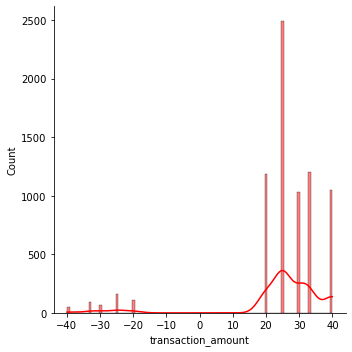

In [361]:
#probabilty distribution of transaction_amount
x =df['transaction_amount' ]
sns.displot(x, color="red",kde=True,);

#Probability distribution of transaction amount is skewed normal distribution.

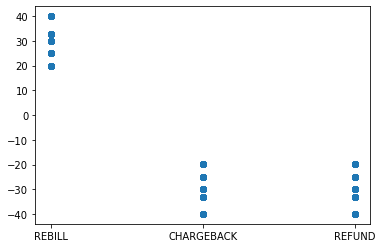

In [362]:
plt.scatter(df.transaction_type, df.transaction_amount)
plt.show()

In [363]:
#it is evident from the scatter plot that chargeback and refunds are negative and no co-relation exits between them.